#Parte 1

Importamos los paquetes necesarios para la implementación del analisis

In [ ]:
!python --version

Python 3.8.10


In [ ]:
### paquetes de impotacion y manejo de datos
import pandas as pd
import numpy as np

# ### paquetes de graficos
import matplotlib.pyplot as plot
# from scipy import stats

# ######  paquetes de analitica de datos
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


Lectura del archivo, asignación de columnas con sus nombres correspondientes y limpieza de variables que no corresponden al tipo o son NaN (Not a number)


In [ ]:
archivo = 'auto-mpgv2.csv'

file_csv = pd.read_csv(archivo)


column_name = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin']

file_csv.columns = column_name


for column in numeric_columns:
    file_csv[column]=pd.to_numeric(file_csv[column], errors='coerce')
    file_csv[column]=file_csv[column]*-1
    
file_csv = file_csv.dropna()

Eliminación de atipicos, teniendo en cuenta el primer y tercer cuartil

In [ ]:
def sin_atipicos(df, numeric_columns):
    cleaned_df = df.copy()
    indices = pd.DataFrame()
    filas_atipicas = set()
    for columna in numeric_columns:
        datos = df[columna]
        np.int_(datos)
        q1 = np.percentile(datos, 25)
        
        q3 = np.percentile(datos, 75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        for index, value in enumerate(datos):
            if value < limite_inferior or limite_superior < value:
                filas_atipicas.add(index)
                indice=file_csv.iloc[index]
                indices=indices.append([indice])
                
    filas_atipicas = list(filas_atipicas)
    filas_atipicas.sort()
    cleaned_df = cleaned_df.drop(index=filas_atipicas)
    return cleaned_df, indices

cleaned_df, filasatipicas = sin_atipicos(file_csv, numeric_columns)

mpg                        -14.0
cylinders                     -8
displacement              -454.0
horsepower                -220.0
weight                     -4354
acceleration                -9.0
model year                   -70
origin                        -1
car name        chevrolet impala
Name: 6, dtype: object
mpg                         -14.0
cylinders                      -8
displacement               -440.0
horsepower                 -215.0
weight                      -4312
acceleration                 -8.5
model year                    -70
origin                         -1
car name        plymouth fury iii
Name: 7, dtype: object
mpg                        -14.0
cylinders                     -8
displacement              -455.0
horsepower                -225.0
weight                     -4425
acceleration               -10.0
model year                   -70
origin                        -1
car name        pontiac catalina
Name: 8, dtype: object
mpg                            

Matriz de correlación sin atipicos

In [ ]:
matriz_c = cleaned_df.corr()
matriz_c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.770825,-0.804341,-0.781609,-0.828944,0.389099,0.558813,0.554786
cylinders,-0.770825,1.000000,0.953286,0.848580,0.897288,-0.475730,-0.305379,-0.561830
displacement,-0.804341,0.953286,1.000000,0.891637,0.941227,-0.501849,-0.323421,-0.616062
horsepower,-0.781609,0.848580,0.891637,1.000000,0.879254,-0.661135,-0.358450,-0.452985
weight,-0.828944,0.897288,0.941227,0.879254,1.000000,-0.391180,-0.275279,-0.583092
acceleration,0.389099,-0.475730,-0.501849,-0.661135,-0.391180,1.000000,0.232377,0.185870
model year,0.558813,-0.305379,-0.323421,-0.358450,-0.275279,0.232377,1.000000,0.155725
origin,0.554786,-0.561830,-0.616062,-0.452985,-0.583092,0.185870,0.155725,1.000000


Matriz de correlación con atipicos

In [ ]:
matriz_b = file_csv.corr()
matriz_b

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##Gráficos de dispersión

###Sin atipicos

X= horsepower Y= mpg

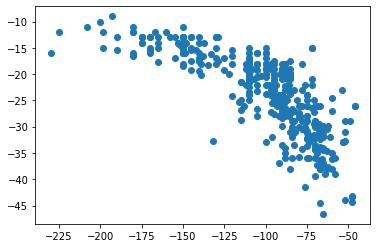

In [ ]:
plot.subplots()
plot.scatter(x=cleaned_df["horsepower"],y=cleaned_df["mpg"])

X= weight Y=mpg

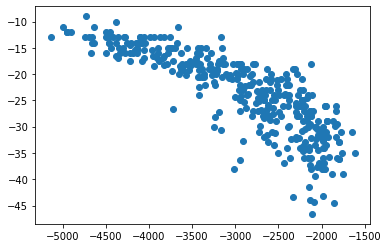

In [ ]:
plot.subplots()
plot.scatter(x=cleaned_df["weight"],y=cleaned_df["mpg"])

### Con atipicos

X= horsepower Y= mpg

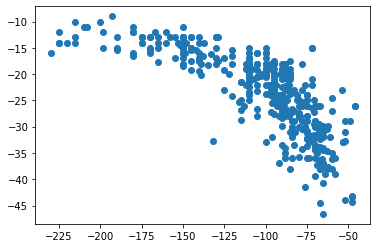

In [ ]:
plot.subplots()
plot.scatter(x=file_csv["horsepower"],y=file_csv["mpg"])

X= weight Y=mpg

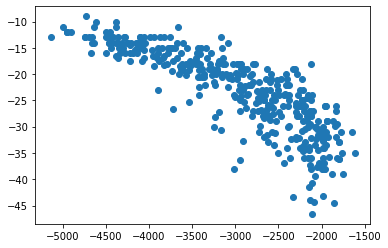

In [ ]:
plot.subplots()
plot.scatter(x=file_csv["weight"],y=file_csv["mpg"])

##Entrenamiento del modelo y evaluación con el coeficiente r2

Con atipicos

In [ ]:
X= file_csv[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=file_csv['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: 0.8009118607804471


Sin atipicos

In [ ]:
X= cleaned_df[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=cleaned_df['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: 0.7884012035192765


A pesar de hacer los procesos de limpieza de atipicos, seleccionar variables relacionadas con MPG, el modelo aun no tiene el comportamiento deseado, el cual es que R2 alcance el 0.88, pero hay cierta aleatoriedad, dado que la fracción de datos con los cuales entrena y evalua son dinámicos, hay ocasiones en las cuales el modelo alcanza el comportamiento deseado, pero es una ocasión muy rara

In [ ]:
X= file_csv[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=file_csv['mpg']
contador=0
while(True):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
    modelo2 = LinearRegression()
    modelo2.fit(X=np.array(X_train),y=Y_train)
    predicciones = modelo2.predict(X= np.array(X_test))
    r2 = r2_score(y_true= Y_test, y_pred= predicciones)
    contador=contador+1
    if(r2>0.88):
        break

print("El valor de r2 es:",r2)
print("El porcentaje de exito de r2 para obtener este resultado fue: ",(r2/contador)*100)

El valor de r2 es: 0.885790298933807
El porcentaje de exito de r2 para obtener este resultado fue:  0.0014176500791156107


#Parte 2

Selección de los vehículos, seleccionaron los 5 vehiculos que más veces se encuentran en el dataset, para tener la mayor muestra posible de cada auto a evaluar

In [ ]:
carros=file_csv.value_counts("car name")
carros

car name
toyota corolla          5
amc matador             5
ford pinto              5
toyota corona           4
amc hornet              4
                       ..
dodge rampage           1
dodge st. regis         1
fiat 124 sport coupe    1
fiat 124 tc             1
vw rabbit custom        1
Length: 301, dtype: int64

In [ ]:
carro1 = file_csv.loc[file_csv['car name'] == "toyota corolla"]
carro2 = file_csv.loc[file_csv['car name'] == "amc matador"]
carro3 = file_csv.loc[file_csv['car name'] == "ford pinto"]
carro4 = file_csv.loc[file_csv['car name'] == "toyota corona"]
carro5 = file_csv.loc[file_csv['car name'] == "amc hornet"]


##Regresiones y gráficos de dispersión:
Las variables a evaluar en el gráfico de dispersión son:
X= horsepower , Y = mpg

Carro1

In [ ]:
X= carro1[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=carro1['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: 0.7259833384962642


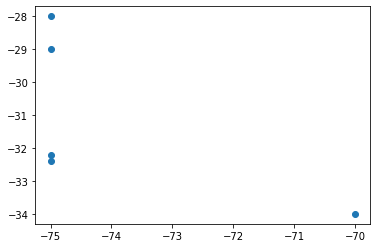

In [ ]:
plot.subplots()
plot.scatter(x=carro1["horsepower"],y=carro1["mpg"])

Carro2

In [ ]:
X= carro2[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=carro2['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: -10.719731078785426


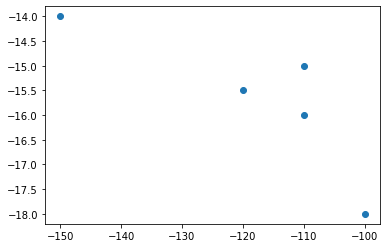

In [ ]:
plot.subplots()
plot.scatter(x=carro2["horsepower"],y=carro2["mpg"])

Carro3

In [ ]:
X= carro2[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=carro2['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: -18.80290052609133


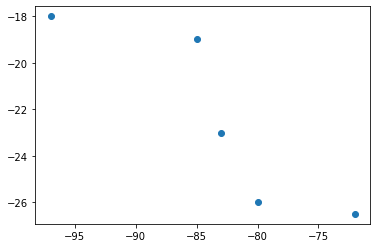

In [ ]:
plot.subplots()
plot.scatter(x=carro3["horsepower"],y=carro3["mpg"])

Carro4

In [ ]:
X= carro2[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=carro2['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: -10.546939409604807


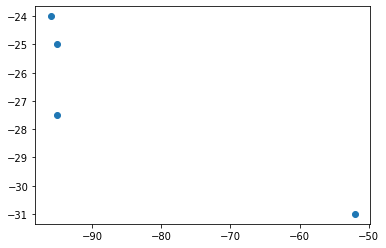

In [ ]:
plot.subplots()
plot.scatter(x=carro4["horsepower"],y=carro4["mpg"])

Carro5

In [ ]:
X= carro2[['model year','weight','acceleration','cylinders','displacement','horsepower','origin']]
Y=carro2['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6)
modelo2 = LinearRegression()
modelo2.fit(X=np.array(X_train),y=Y_train)
predicciones = modelo2.predict(X= np.array(X_test))
r2 = r2_score(y_true= Y_test, y_pred= predicciones)
print("El valor de r2 es:",r2)

El valor de r2 es: -3.102836465433379


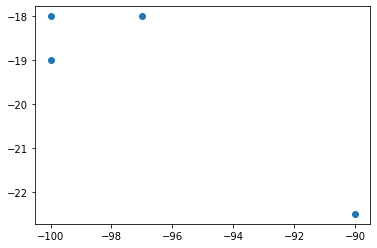

In [ ]:
plot.subplots()
plot.scatter(x=carro5["horsepower"],y=carro5["mpg"])